In [1]:
import matplotlib.pyplot as plt
import csv
import typing
import numpy as np
# recording 60 seconds of data
TIME = 60
START = 5

In [2]:
# get the average of the data per seconds
def readData_perSecond(f : typing.TextIO):
    
    data_sum = np.zeros(TIME)
    data_count = np.zeros(TIME)

    reader = csv.reader(f, delimiter=',')
    for r in reader:
        # get time and round down
        time = int(float(r[0]))
        data = float(r[1])

        #  only collect data is this time interval
        if time < START + TIME:
            data_sum[time - START] += data
            data_count[time - START] += 1

    return np.divide(data_sum, data_count)

In [3]:
def readData_allAvg(f : typing.TextIO):

    data_sum = 0
    data_count = 0

    reader = csv.reader(f, delimiter=',')
    for r in reader:
        # get time and round down
        time = int(float(r[0]))
        data = float(r[1])

        #  only collect data is this time interval
        if time < START + TIME:
            data_sum += data
            data_count += 1

    return data_sum / data_count

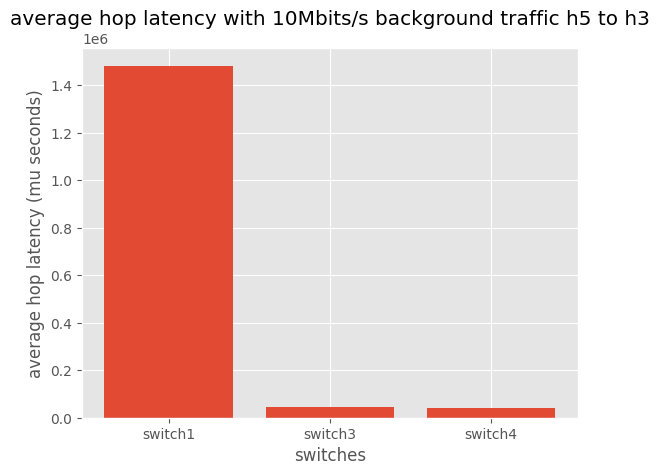

In [4]:
# open file
s1_data = None
s2_data = None
s3_data = None

with open("s1_data.txt", "r") as s1, \
     open("s3_data.txt", "r") as s3, \
     open("s4_data.txt", "r") as s4 :

     s1_data = readData_allAvg(s1)
     s3_data = readData_allAvg(s3)
     s4_data = readData_allAvg(s4)
     plt.style.use('ggplot')
     plt.bar(['switch1', 'switch3', 'switch4'], [s1_data, s3_data, s4_data])
     plt.xlabel('switches')
     plt.ylabel('average hop latency (mu seconds)')
     plt.title('average hop latency with 10Mbits/s background traffic h5 to h3')
     plt.show()